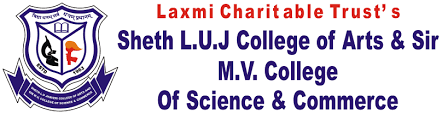

**RAM KUMAR SINGH T118**

**Practical no.3**

Aim:Feature Scaling and Dummification

Apply feature-scaling techniques like standardization and normalization to
numerical features.

Perform feature dummification to convert categorical variables into numerical
representations.

Part 1 — Handling Numerical Data

1. Import Libraries & Load Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

df = pd.read_csv("heart.csv")
print("Original Data Head:")
print(df.head())


Original Data Head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


2. Rescaling a Feature (Min–Max Scaling for 'age')

In [ ]:
feature_age = df[['age']].values
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_age = minmax_scaler.fit_transform(feature_age)

print("Scaled Age (First 5 values):")
print(scaled_age[:5].flatten())


Scaled Age (First 5 values):
[0.70833333 0.16666667 0.25       0.5625     0.58333333]


3. Standardizing a Feature (Z-Score & Robust Scaling for 'chol')

In [ ]:
feature_chol = df[['chol']].values

scaler = preprocessing.StandardScaler()
standardized_chol = scaler.fit_transform(feature_chol)

print("Standardized Cholesterol (Mean, Std):")
print(standardized_chol.mean(), standardized_chol.std())

robust_scaler = preprocessing.RobustScaler()
robust_chol = robust_scaler.fit_transform(feature_chol)

print("\nRobust Scaled Cholesterol (First 5 values):")
print(robust_chol[:5].flatten())


Standardized Cholesterol (Mean, Std):
-1.1138871270166586e-16 0.9999999999999999

Robust Scaled Cholesterol (First 5 values):
[-0.11023622  0.15748031 -0.56692913 -0.06299213  1.79527559]


4. Normalizing Observations (‘thalach’ & ‘trestbps’)

In [ ]:
features_norm = df[['thalach', 'trestbps']].values
normalizer = Normalizer(norm="l2")
normalized_features = normalizer.transform(features_norm)

print("Normalized Features (First 5 rows):")
print(normalized_features[:5])


Normalized Features (First 5 rows):
[[0.71898838 0.6950221 ]
 [0.82108415 0.57080716]
 [0.79776816 0.60296431]
 [0.82917255 0.55899273]
 [0.80530412 0.59286193]]


5. Clustering Observations (‘age’ & ‘chol’)

In [ ]:
features_cluster = df[['age', 'chol']].values
clusterer = KMeans(3, random_state=0)
df['cluster_group'] = clusterer.fit_predict(features_cluster)

print(df[['age','chol','cluster_group']].head())


   age  chol  cluster_group
0   63   233              0
1   37   250              0
2   41   204              2
3   56   236              0
4   57   354              1


6. Handling Missing Numerical Data (Impute ‘thalach’)

In [ ]:
df_missing = df.copy()
df_missing.loc[0:10, 'thalach'] = np.nan

imputer_mean = SimpleImputer(strategy="mean")
imputed_thalach = imputer_mean.fit_transform(df_missing[['thalach']])

print("Imputed 'thalach' values (first 5):")
print(imputed_thalach[:5].flatten())


Imputed 'thalach' values (first 5):
[149.05136986 149.05136986 149.05136986 149.05136986 149.05136986]


**Part 2 — Handling Categorical Data & Imbalanced Classes**

7. Import Libraries (Categorical Encoding)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.neighbors import KNeighborsClassifier


8. One-Hot Encoding Nominal Feature (‘cp’ – Chest Pain Type)

In [ ]:
feature_cp = df[['cp']].values
one_hot = LabelBinarizer()
cp_encoded = one_hot.fit_transform(feature_cp)

print("One-Hot Encoded CP (First 5 rows):")
print(cp_encoded[:5])
print("Classes:", one_hot.classes_)


One-Hot Encoded CP (First 5 rows):
[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]]
Classes: [0 1 2 3]


9. Encoding Dictionaries of Features (‘sex’ & ‘fbs’)

In [ ]:
data_dict = df[['sex', 'fbs']].to_dict(orient='records')
dictvectorizer = DictVectorizer(sparse=False)
features_dict = dictvectorizer.fit_transform(data_dict)

print("Dictionary Vectorized (first row):")
print(features_dict[0])
print("Feature names:", dictvectorizer.get_feature_names_out())


Dictionary Vectorized (first row):
[1. 1.]
Feature names: ['fbs' 'sex']


10. Ordinal Encoding by Binning (‘age’ → Young/Middle/Senior)

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 55, 100],
                         labels=["Young", "Middle", "Senior"])

age_map = {"Young": 1, "Middle": 2, "Senior": 3}
df['age_group_encoded'] = df['age_group'].map(age_map)

print(df[['age','age_group','age_group_encoded']].head())


   age age_group age_group_encoded
0   63    Senior                 3
1   37    Middle                 2
2   41    Middle                 2
3   56    Senior                 3
4   57    Senior                 3


11. Predict Missing Class Values using KNN (‘sex’)

In [ ]:
X_knn = df[['age','chol']].values
y_knn = df['sex'].values

X_train = X_knn[10:]
y_train = y_knn[10:]

clf_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
clf_knn.fit(X_train, y_train)

predicted_sex = clf_knn.predict([X_knn[0]])
print("Predicted missing 'sex' value:", predicted_sex[0])


Predicted missing 'sex' value: 1


12. Handling Imbalanced Classes (‘target’)

In [ ]:

i_class_1 = np.where(df['target'] == 1)[0]
i_class_0 = np.where(df['target'] == 0)[0]

minority_size = min(len(i_class_1), len(i_class_0))

downsampled_1 = np.random.choice(i_class_1, size=minority_size, replace=False)
downsampled_0 = np.random.choice(i_class_0, size=minority_size, replace=False)

final_indices = np.hstack((downsampled_1, downsampled_0))
df_balanced = df.iloc[final_indices]

print("Balanced Target Distribution:")
print(df_balanced['target'].value_counts())


Balanced Target Distribution:
target
1    138
0    138
Name: count, dtype: int64
